In [1]:
__author__ = 'xuanzee'

In [2]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import itertools

In [3]:
data_atp = pd.read_csv('tennis_stats.csv')

### Preview Data

In [4]:
data_atp.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [5]:
data_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [6]:
data_atp.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


### Explore Relationship Between Features and Outcomes

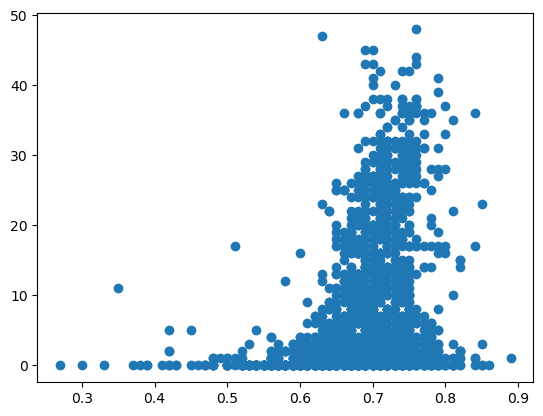

In [7]:
plt.scatter('FirstServePointsWon', 'Wins', data=data_atp)

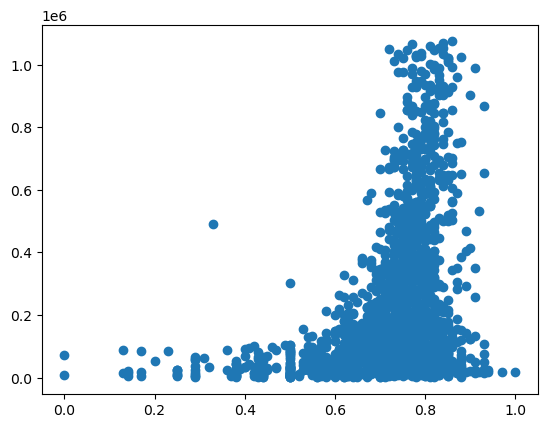

In [8]:
plt.scatter('ServiceGamesWon', 'Winnings', data=data_atp)

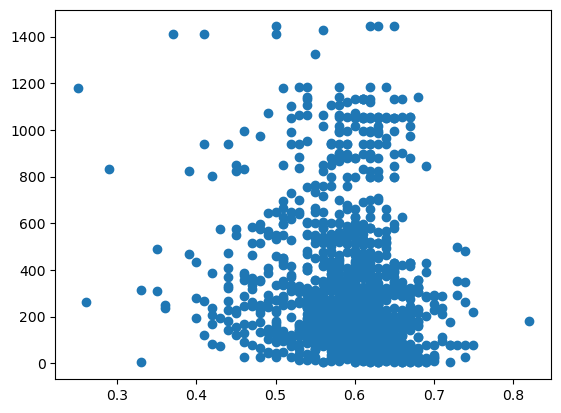

In [9]:
plt.scatter('TotalServicePointsWon', 'Ranking', data=data_atp)

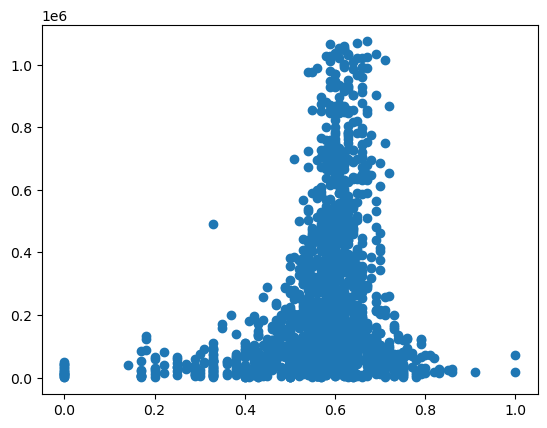

In [10]:
plt.scatter('BreakPointsSaved', 'Winnings', data=data_atp)

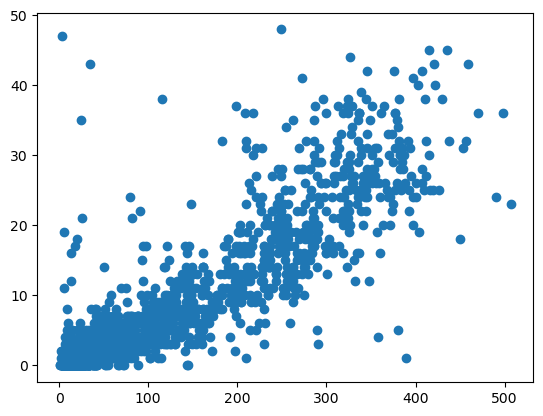

In [11]:
plt.scatter('BreakPointsFaced', 'Wins', data=data_atp)

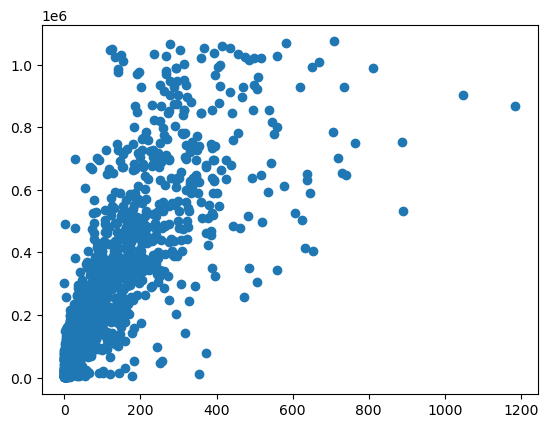

In [12]:
plt.scatter('Aces', 'Winnings', data=data_atp)

### Preparing Data for Modeling

In [13]:
features = ['Aces', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 
            'TotalServicePointsWon', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 
            'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesWon', 'ReturnPointsWon', 
            'TotalPointsWon']
outcomes = ['Wins', 'Winnings', 'Ranking']

### OLS Between Any 1 Feature and Any 1 Outcome

In [14]:
def OLS_score(feature, outcome, train_size_percent=.8):
    x_train, x_test, y_train, y_test = train_test_split(data_atp[[feature]], data_atp[[outcome]], 
                                                        train_size=train_size_percent) #note the double square brackets.
    OLS = LinearRegression()
    OLS.fit(x_train, y_train)
    return OLS.score(x_test, y_test), OLS, x_test, y_test

OLS model with 1 feature and 1 outcome:
Best model score: 0.914
Feature: BreakPointsOpportunities
Outcome: Wins


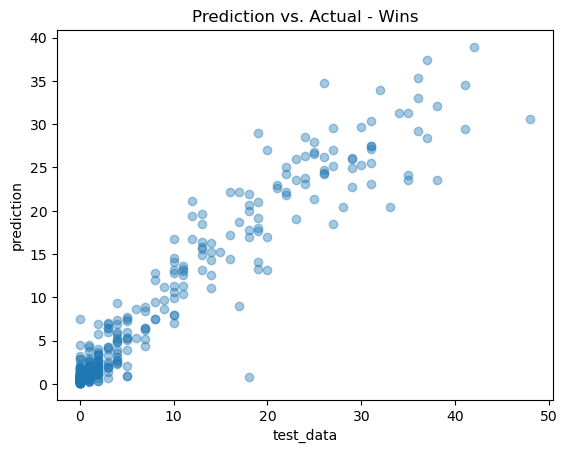

In [15]:
max_score = 0
for f in features:
    for o in outcomes:
        score, model, x_test, y_test = OLS_score(f, o)
        if score > max_score:
            max_score = score
            best_model = model
            x_test_kept = x_test
            y_test_kept = y_test
            variable_pair = (f, o)
        else:
            pass
if max_score == 0:
    print('No viable OLS model between 1 feature and 1 outcome was found.')
else:
    print('OLS model with 1 feature and 1 outcome:')
    print('Best model score:', round(max_score, 3))
    print('Feature:', variable_pair[0])
    print('Outcome:', variable_pair[1])
    prediction = best_model.predict(x_test_kept)
    plt.scatter(y_test_kept, prediction, alpha=.4)
    plt.title('Prediction vs. Actual - ' + variable_pair[1])
    plt.xlabel('test_data')
    plt.ylabel('prediction')

### OLS Between 2 Features and 1 Outcome (Yearly Earnings)

In [16]:
def OLS_multi_score(feature, outcome, train_size_percent=.8):
    '''
    writing a different function due to the format of feature for dataframe changing.
    i.e. elements of the iterated results converting to list.
    '''
    x_train, x_test, y_train, y_test = train_test_split(data_atp[feature], data_atp[[outcome]], 
                                                        train_size=train_size_percent)
    OLS = LinearRegression()
    OLS.fit(x_train, y_train)
    return OLS.score(x_test, y_test), OLS, x_test, y_test

In [17]:
comb = itertools.combinations(features, 2)
comb = [x for x in comb]
comb_cnt = len(comb)

OLS model with 2 features and the outcome of Yearly Earnings:
Best model score: 0.838
Features:
 ['ReturnPointsWon', 'TotalPointsWon']


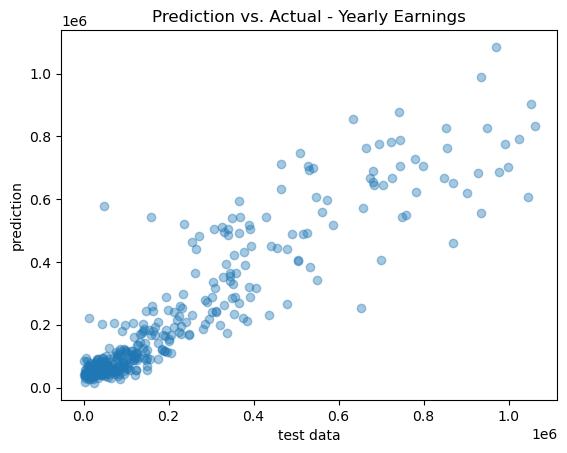

In [18]:
max_score = 0
for i in range(comb_cnt):
    f = list(comb[i])
    score, model, x_test, y_test = OLS_multi_score(f, 'Winnings')
    if score > max_score:
        max_score = score
        best_model = model
        x_test_kept = x_test
        y_test_kept = y_test
    else:
        pass
if max_score == 0:
    print('No viable OLS model between 2 features and yearly earnings was found.')
else:
    print('OLS model with 2 features and the outcome of Yearly Earnings:')
    print('Best model score:', round(max_score, 3))
    print('Features:\n', f)
    prediction = best_model.predict(x_test_kept)
    plt.scatter(y_test_kept, prediction, alpha=.4)
    plt.title('Prediction vs. Actual - Yearly Earnings')
    plt.xlabel('test data')
    plt.ylabel('prediction')

### OLS Between 3+ Features and 1 Outcome (Yearly Earnings)

In [19]:
feature_cnt = len(features)

OLS model with 3+ features and the outcome of Yearly Earnings:
Best model score: 0.901
# of features: 8
Features:
 ['Aces', 'SecondServePointsWon', 'BreakPointsSaved', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesWon']


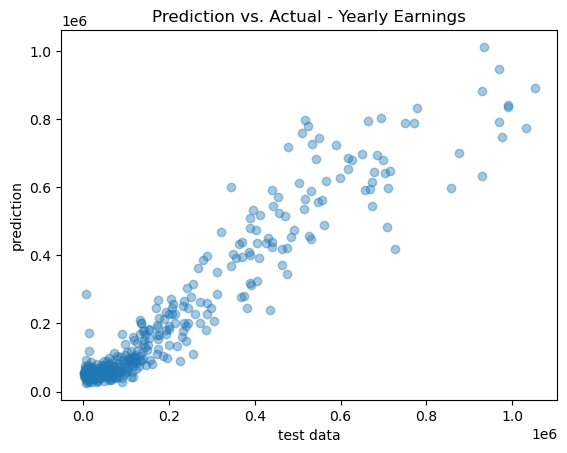

In [20]:
max_score = 0

for j in range(3, feature_cnt+1):
    comb = itertools.combinations(features, j)
    comb = [x for x in comb]
    comb_cnt = len(comb)
    for i in range(comb_cnt):
        f = list(comb[i])
        score, model, x_test, y_test = OLS_multi_score(f, 'Winnings')
        if score > max_score:
            max_score = score
            best_model = model
            x_test_kept = x_test
            y_test_kept = y_test
            best_f = f
        else:
            pass

if max_score == 0:
    print('No viable OLS model between 3+ features and yearly earnings was found.')
else:
    print('OLS model with 3+ features and the outcome of Yearly Earnings:')
    print('Best model score:', round(max_score, 3))
    print('# of features:', len(best_f))
    print('Features:\n', best_f)
    prediction = best_model.predict(x_test_kept)
    plt.scatter(y_test_kept, prediction, alpha=.4)
    plt.title('Prediction vs. Actual - Yearly Earnings')
    plt.xlabel('test data')
    plt.ylabel('prediction')